### Natural Language Processing - Assignment 4
#### September 2021

###### Name: Kavishka Gamage
###### Index No: 17000475

### Import modules

In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from collections import Counter

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import 	WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

pd.set_option('display.max_colwidth', 1000)

### Answer (a)

1. Read test, train files and merge to one dataframe
2. preprocessing
3. print number of suggesions ans non suggessions
4. print number of total words and unique words

#### a) 1. Read test, train files and merge to one dataframe

In [279]:
# read train and test files

df_train = pd.read_csv('./Train/hotel.csv',sep=',',header=None)
df_test = pd.read_csv('./Test/hotel.csv',sep=',', header= None)

print(" Train datset size = ",len(df_train)," Test dataset size = ",len(df_test))

# merge two datasets
df = df_train.append(df_test,ignore_index=True)
print(" Full dataset size =", len(df))

# rename columns for readability
df.columns=["id",'text','label']

df.head()

 Train datset size =  7534  Test dataset size =  808
 Full dataset size = 8342


,id,text,label
0,berlin-hotel-190599-review-1.json_0,This hotel was very modern and sleek.,0
1,berlin-hotel-190599-review-1.json_1,"Beautiful, well-laid out, albeiit small rooms.",0
2,berlin-hotel-190599-review-1.json_2,"Fantastic breakfast with an incredible selection of meats, cheeses, yogurts, breads etc. And, as a non-German speaker,",0
3,berlin-hotel-190599-review-1.json_3,the staff were uber-helpful.,0
4,berlin-hotel-190599-review-1.json_4,Great location in front of a u-bahn stop.,0


Train and Test dataset is merged and in complete dataset there are three columns which named as id,text,label. 
label represent 0 as non suggesion and 1 as suggesion. Complete dataset has 8342 instances

#### a) 2. preprocessing  

In [280]:
# decided to conduct mimimal preprocessing after observing data it dont include emojis or unicode symbols
# Numbers shouldn't be removed because it's important in this problem context 
# remove puntuation Symbols except question mark and !


def removePunctuation(txt):
    exclude = set(".…,‌ ¸‚\"/|—¦”‘\'“’´<>#$%^=&*+\-£˜()\[\]{\}:;–Ê_�")
    return ''.join([(c if c not in exclude else " ") for c in txt])

# removing digits    
def removeNumber(txt):
    return ''.join(c for c in txt if not c.isnumeric())

# lowercase and tokenize
def lowercase(txt):
    return [t.lower() for t in word_tokenize(txt)]

print("Before preprocessing")
display(df['text'].head())

df['cleaned'] = df['text'].apply(lambda x: removePunctuation(x))
print("Remove selected punctuations \n")
display(df['cleaned'].head())

# df['cleaned'] = df['text'].apply(lambda x: removeNumber(x))
# print("Remove numbers \n")
# display(df['cleaned'].head(n=10))

df['cleaned'] = df['cleaned'].apply(lambda x: lowercase(x))
print("Lowercased and tokenized \n")
display(df['cleaned'].head())


Before preprocessing


0                                                                                     This hotel was very modern and sleek.
1                                                                            Beautiful, well-laid out, albeiit small rooms.
2    Fantastic breakfast with an incredible selection of meats, cheeses, yogurts, breads etc. And, as a non-German speaker,
3                                                                                              the staff were uber-helpful.
4                                                                                 Great location in front of a u-bahn stop.
Name: text, dtype: object

Remove selected punctuations 



0                                                                                     This hotel was very modern and sleek 
1                                                                            Beautiful  well laid out  albeiit small rooms 
2    Fantastic breakfast with an incredible selection of meats  cheeses  yogurts  breads etc  And  as a non German speaker 
3                                                                                              the staff were uber helpful 
4                                                                                 Great location in front of a u bahn stop 
Name: cleaned, dtype: object

Lowercased and tokenized 



0                                                                                           [this, hotel, was, very, modern, and, sleek]
1                                                                                    [beautiful, well, laid, out, albeiit, small, rooms]
2    [fantastic, breakfast, with, an, incredible, selection, of, meats, cheeses, yogurts, breads, etc, and, as, a, non, german, speaker]
3                                                                                                      [the, staff, were, uber, helpful]
4                                                                                     [great, location, in, front, of, a, u, bahn, stop]
Name: cleaned, dtype: object

First removed the puntuation and special characters in text column. Here intentionaly kept ! and ? becuase most of the cases these two punctuation gives a sentiment meaning to a sentence. 

Then preprocessing step followed by lowercasing all text and tokenizing using word_tokenizing in nltk. 
Intentionaly kept numerical values after obervation of dataset. It can be observed most of text compare servies related to star of the hotel. IN order to keep this useful information numeric value kept in the text.

#### a) 3. print number of suggesions and non suggessions

,count
label,
0,7490.0
1,852.0


 Distribution percentage 


0    89.786622
1    10.213378
Name: label, dtype: float64

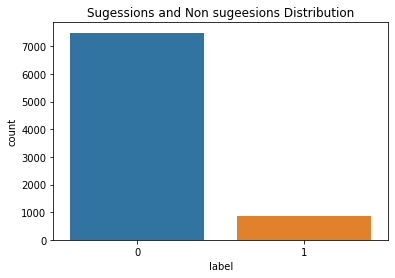

In [281]:
# number of suggesions and non suggessions

display(df.groupby(['label'])['label'].describe()[['count']])

print(" Distribution percentage ")
df.groupby(['label'])['label'].describe()[['count']]

sns.countplot(x='label', data=df).set_title('Sugessions and Non sugeesions Distribution')
df['label'].value_counts(normalize=True) * 100


Highly imbalanced dataset. There are 89% of non suggesion instances and 10% of suggesion instances. However I will keep the distribution same as orginal dataset without going for any data augmentaion steps.

#### a) 4. print number of total words and unique words

In [282]:
# function to print number of total words and unique words

def dataset_details(df):
    
    results = Counter()
    df['cleaned'].apply(results.update)
    unique_words = len(results)
    total_words = df.cleaned.apply(lambda x :len(x)).sum(axis=0)
    max_len = df.cleaned.apply(lambda x :len(x)).max(axis=0)
    min_len = df.cleaned.apply(lambda x :len(x)).min(axis=0)
    print("Unique word count = ", unique_words," Total word count = ",total_words)
    print("Minimum document length = ",min_len," Maximum document length = ",max_len)

dataset_details(df)

Unique word count =  8001  Total word count =  121267
Minimum document length =  0  Maximum document length =  71


### Answer (b)

1. Remove stop words
2. stem or lemmatize
3. print minimum and maximum document size after each step

#### b) 1.Remove stop words

In [283]:
# Insert code for part (b)
# 1. Remove stop words

# Import NLTK stopwords
# nltk.download('stopwords')
def removeStopWords(tokens):
    stop_words = set(stopwords.words('english'))
    return [t for t in tokens if t not in stop_words]
    
# def stop_words():

#     for w in remove_stop_words:
#         if w in stop_words:
#             stop_words.remove(w)
#     return ''.join([(w if w not in stop_words else " ") for w in txt])

print("Before stop word removal")
display(df['cleaned'].head())

df['cleaned'] = df['cleaned'].apply(lambda x: removeStopWords(x))
print("Remove stop words \n")
display(df['cleaned'].head())



Before stop word removal


0                                                                                           [this, hotel, was, very, modern, and, sleek]
1                                                                                    [beautiful, well, laid, out, albeiit, small, rooms]
2    [fantastic, breakfast, with, an, incredible, selection, of, meats, cheeses, yogurts, breads, etc, and, as, a, non, german, speaker]
3                                                                                                      [the, staff, were, uber, helpful]
4                                                                                     [great, location, in, front, of, a, u, bahn, stop]
Name: cleaned, dtype: object

Remove stop words 



0                                                                                       [hotel, modern, sleek]
1                                                               [beautiful, well, laid, albeiit, small, rooms]
2    [fantastic, breakfast, incredible, selection, meats, cheeses, yogurts, breads, etc, non, german, speaker]
3                                                                                       [staff, uber, helpful]
4                                                                      [great, location, front, u, bahn, stop]
Name: cleaned, dtype: object

Stop words remoed to reduce the features dimentionality in text representaion.

In [284]:
# print minimum and maximum document size after stop words removal
dataset_details(df)

Unique word count =  7857  Total word count =  61308
Minimum document length =  0  Maximum document length =  41


It can be oberved there is no larger differnece happend to unique word count but total word count got reduced by very large margin

#### b) 2. stemming

In [285]:
# Initialize NLTK Porter stemmer 
porter = nltk.PorterStemmer()

print("Before stemming \n")
display(df['cleaned'].head())

# Stem the words
df["cleaned"] = df["cleaned"].apply(lambda x: [porter.stem(word) for word in x] )

print(" After stemming \n")
display(df['cleaned'].head())


Before stemming 



0                                                                                       [hotel, modern, sleek]
1                                                               [beautiful, well, laid, albeiit, small, rooms]
2    [fantastic, breakfast, incredible, selection, meats, cheeses, yogurts, breads, etc, non, german, speaker]
3                                                                                       [staff, uber, helpful]
4                                                                      [great, location, front, u, bahn, stop]
Name: cleaned, dtype: object

 After stemming 



0                                                                         [hotel, modern, sleek]
1                                                     [beauti, well, laid, albeiit, small, room]
2    [fantast, breakfast, incred, select, meat, chees, yogurt, bread, etc, non, german, speaker]
3                                                                            [staff, uber, help]
4                                                           [great, locat, front, u, bahn, stop]
Name: cleaned, dtype: object

Stemming also helps to reduce the vocabluary of dataset.

In [286]:
# print minimum and maximum document size after stemming
dataset_details(df)

Unique word count =  5900  Total word count =  61308
Minimum document length =  0  Maximum document length =  41


Total word count has increased and unique word count has got recuded. So vocabluary of dataset get reduced.

#### c) 1. BOW representation

In [287]:
# Insert code for part (c)
# 1. BOW representaion
def bow(X_train,X_test, analyzer="word", ngram=(1,1),min_df = 1):

    X_train = [" ".join(i) for i in X_train]
    bow = CountVectorizer(analyzer=analyzer,ngram_range=ngram,lowercase=False,min_df=min_df)

    X_train_bow = bow.fit_transform(X_train)

    X_test = [" ".join(i) for i in X_test]
    X_test_bow = bow.transform(X_test)

    #print(bow.get_feature_names()[:20])
    #print('The shape is', bow.shape)
    # postion
    #print(bow.vocabulary_)

    return X_train_bow,X_test_bow

#### c) 2. TFIDF representation

In [288]:
# 2. TFIDF representation
def tfidf(X_train,X_test,analyzer="word", ngram=(1,1),min_df=1):

    X_train = [" ".join(i) for i in X_train]
    tfidf = TfidfVectorizer(analyzer=analyzer,ngram_range=ngram,lowercase=False,min_df=min_df)
    X_train_tfidf = tfidf.fit_transform(X_train)
    #
    X_test = [" ".join(i) for i in X_test]
    X_test_tfidf = tfidf.transform(X_test)
    # print(tfidf.get_feature_names()[:20])
    # #print('The shape is', tfidf.shape)
    # # postion
    # print(tfidf.vocabulary_)
    return X_train_tfidf,X_test_tfidf

#### c) 3. supervised classifier

In [289]:
# 3. Supervised classifiers

# logistic regression
def lr(X_train,X_test,Y_train):
    lr = LogisticRegression()
    lr.fit(X_train,Y_train)
    Y_pred = lr.predict(X_test)
    return Y_pred

# SVC
def svc(X_train,X_test,Y_train):
    svc = SVC(kernel="linear")
    svc.fit(X_train,Y_train)
    Y_pred = svc.predict(X_test)
    return Y_pred
    


#### c) 4. evaluation

In [290]:

# function to evalaute multiple classifier and multiple feature representations
def classifier_feature(df,models,features,analyzer = "word", ngram=(1,1),min_df=1):

    final_result =pd.DataFrame(columns=['Accuracy','F1-score','Recall','Precision','AUC'])

    # use stratified sampling considering label distribution
    X_train, X_test, Y_train, Y_test = train_test_split(df['cleaned'], df['label'], test_size=0.3, random_state=0, stratify=df['label'].values)
    print("X train {} Y train {} X test {} Y test {}".format(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape))

    # feature representations
    for feature_name,feature in features.items():
        feature_result =pd.DataFrame(columns=['Accuracy','F1-score','Recall','Precision','AUC'])
        X_train_f,X_test_f = feature(X_train,X_test,analyzer,ngram,min_df)
        
        #classifeir representation
        for model_name,model in models.items():
            name = feature_name+ " + "+ model_name
            print(name)
            Y_pred = model(X_train_f,X_test_f,Y_train)
            accuracy, f1_score, recall, precision, auc = result(Y_test,Y_pred)
            final_result.loc[name] = [accuracy, f1_score, recall, precision, auc]
            feature_result.loc[model_name] =[accuracy, f1_score, recall, precision, auc]
        print(" ==== ",feature_name ," ==== ")
        display(feature_result)
    print(" ==== Final Result Summary ==== ")
    display(final_result)
    return final_result

In [291]:
# function to print evaluation matrix and confusion matrix
def result(y_test, y_pred):

    classes = np.unique(y_test)
 
    accuracy = metrics.accuracy_score(y_test, y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)

    print(metrics.classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, cbar=False)
    ax.set(xlabel="Predicted", ylabel="Actual", xticklabels=classes,
           yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)
    plt.show()
  
    return (accuracy, f1_score, recall, precision, auc)

X train (5839,) Y train (5839,) X test (2503,) Y test (2503,)
bow + lr
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      2247
           1       0.67      0.36      0.47       256

    accuracy                           0.92      2503
   macro avg       0.80      0.67      0.71      2503
weighted avg       0.90      0.92      0.90      2503



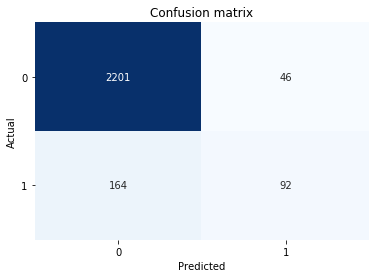

bow + svc
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2247
           1       0.57      0.48      0.52       256

    accuracy                           0.91      2503
   macro avg       0.76      0.72      0.73      2503
weighted avg       0.90      0.91      0.91      2503



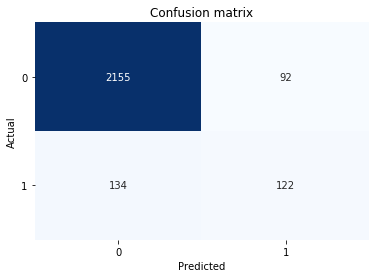

 ====  bow  ==== 


,Accuracy,F1-score,Recall,Precision,AUC
lr,0.916101,0.467005,0.359375,0.666667,0.669452
svc,0.909708,0.519149,0.476562,0.570093,0.717810


tfidf + lr
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2247
           1       0.66      0.12      0.20       256

    accuracy                           0.90      2503
   macro avg       0.78      0.56      0.58      2503
weighted avg       0.88      0.90      0.87      2503



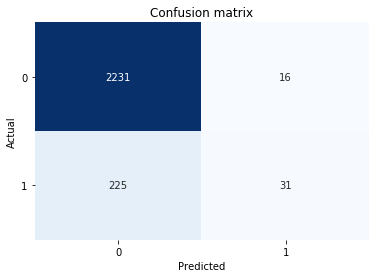

tfidf + svc
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2247
           1       0.68      0.25      0.37       256

    accuracy                           0.91      2503
   macro avg       0.80      0.62      0.66      2503
weighted avg       0.90      0.91      0.89      2503



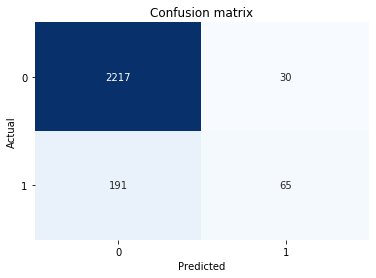

 ====  tfidf  ==== 


,Accuracy,F1-score,Recall,Precision,AUC
lr,0.903716,0.20462,0.121094,0.659574,0.556987
svc,0.911706,0.37037,0.253906,0.684211,0.620278


 ==== Final Result Summary ==== 


,Accuracy,F1-score,Recall,Precision,AUC
bow + lr,0.916101,0.467005,0.359375,0.666667,0.669452
bow + svc,0.909708,0.519149,0.476562,0.570093,0.717810
tfidf + lr,0.903716,0.204620,0.121094,0.659574,0.556987
tfidf + svc,0.911706,0.370370,0.253906,0.684211,0.620278


In [292]:
model_dict = {"lr":lr,'svc':svc}
feature_dict = {"bow":bow,"tfidf":tfidf}
final_result1 = classifier_feature(df,model_dict,feature_dict)

BOW and TF-IDF Text represntaions for unigrams conducted with Logistic regressiona (LR) and support vecotr classifer (SVC). Here I have used linear kernel after experimenting poort performence with default rbf kernel. 

BOW and SVC combinaiton gives the best F1-score and AUC score. This combination able to idnetify 122 suggesions correctly. Accuaracy metric will not be considered to compare classifier and text representaion combination result as this is imbalanced dataset.

### Answer (d)

1. suggest improvements
2. implement suggested improvement
3. evaluate improvement
4. print confusion matrix of best combination

#### d) 1. suggest improvement

Improvents to increase performence

1. Use character analyzer in bow , tfidf representaion.
2. change n-gram range in vectorizers.
3. Eliminate words doesn't appear more than twise 

#### d) 2. implement suggested improvements

X train (5839,) Y train (5839,) X test (2503,) Y test (2503,)
bow-char + lr
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      2247
           1       0.67      0.40      0.50       256

    accuracy                           0.92      2503
   macro avg       0.80      0.69      0.73      2503
weighted avg       0.91      0.92      0.91      2503



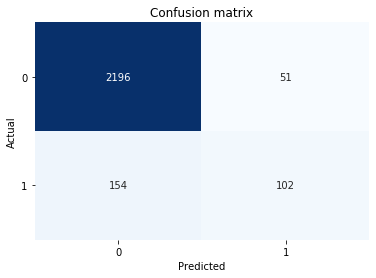

bow-char + svc
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      2247
           1       0.58      0.43      0.49       256

    accuracy                           0.91      2503
   macro avg       0.76      0.70      0.72      2503
weighted avg       0.90      0.91      0.90      2503



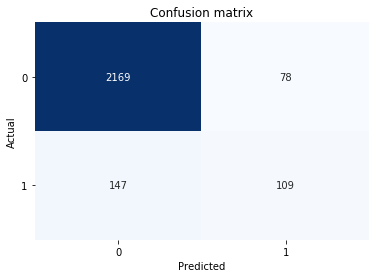

 ====  bow-char  ==== 


,Accuracy,F1-score,Recall,Precision,AUC
lr,0.918098,0.498778,0.398438,0.666667,0.687870
svc,0.910108,0.492099,0.425781,0.582888,0.695534


tfidf-char + lr
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2247
           1       0.73      0.07      0.13       256

    accuracy                           0.90      2503
   macro avg       0.82      0.54      0.54      2503
weighted avg       0.89      0.90      0.87      2503



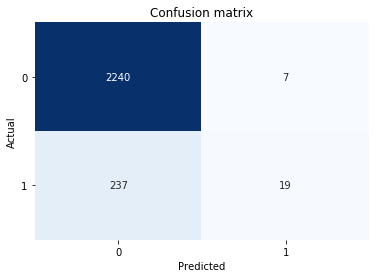

tfidf-char + svc
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2247
           1       0.77      0.23      0.35       256

    accuracy                           0.91      2503
   macro avg       0.84      0.61      0.65      2503
weighted avg       0.90      0.91      0.89      2503



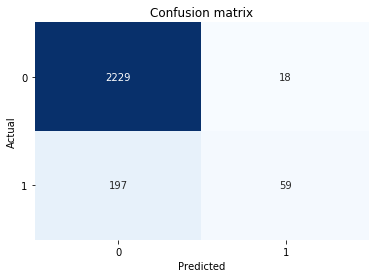

 ====  tfidf-char  ==== 


,Accuracy,F1-score,Recall,Precision,AUC
lr,0.902517,0.134752,0.074219,0.730769,0.535552
svc,0.914103,0.354354,0.230469,0.766234,0.611229


 ==== Final Result Summary ==== 


,Accuracy,F1-score,Recall,Precision,AUC
bow-char + lr,0.918098,0.498778,0.398438,0.666667,0.687870
bow-char + svc,0.910108,0.492099,0.425781,0.582888,0.695534
tfidf-char + lr,0.902517,0.134752,0.074219,0.730769,0.535552
tfidf-char + svc,0.914103,0.354354,0.230469,0.766234,0.611229


In [294]:
# 2. implement suggesion 1  - character analyzer

model_dict = {"lr":lr,'svc':svc}
feature_dict = {"bow-char":bow,"tfidf-char":tfidf}
final_result2 = classifier_feature(df,model_dict,feature_dict,analyzer='char',ngram=(3,6))

This suggested improvement couldn't  surprass previously conducted BOW + SVC text representaion and classifier combination. Here best F1-score 0.498 achived with BOW character text (character wise count frequncy) representation and Logistic regression classifier.

X train (5839,) Y train (5839,) X test (2503,) Y test (2503,)
bow-words + lr
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2247
           1       0.71      0.31      0.43       256

    accuracy                           0.92      2503
   macro avg       0.82      0.65      0.69      2503
weighted avg       0.90      0.92      0.90      2503



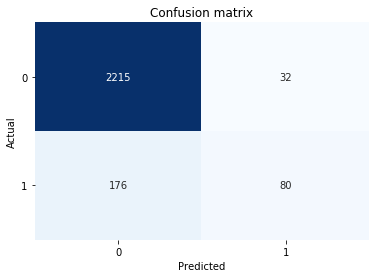

bow-words + svc
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2247
           1       0.64      0.40      0.49       256

    accuracy                           0.92      2503
   macro avg       0.79      0.69      0.72      2503
weighted avg       0.90      0.92      0.91      2503



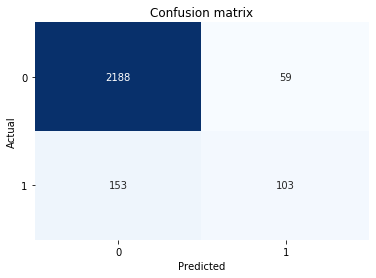

 ====  bow-words  ==== 


,Accuracy,F1-score,Recall,Precision,AUC
lr,0.916900,0.434783,0.312500,0.714286,0.649129
svc,0.915302,0.492823,0.402344,0.635802,0.688043


tfidf-words + lr
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2247
           1       0.76      0.10      0.18       256

    accuracy                           0.90      2503
   macro avg       0.84      0.55      0.56      2503
weighted avg       0.89      0.90      0.87      2503



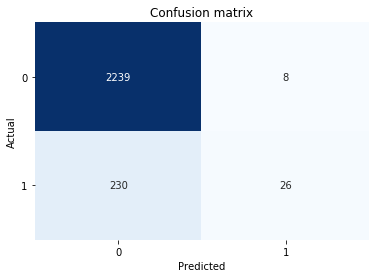

tfidf-words + svc
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      2247
           1       0.71      0.32      0.44       256

    accuracy                           0.92      2503
   macro avg       0.82      0.65      0.70      2503
weighted avg       0.90      0.92      0.90      2503



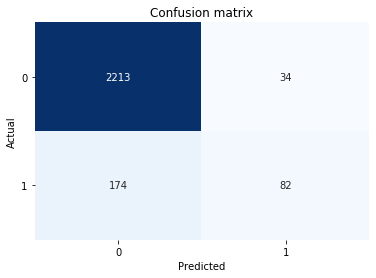

 ====  tfidf-words  ==== 


,Accuracy,F1-score,Recall,Precision,AUC
lr,0.904914,0.17931,0.101562,0.764706,0.549001
svc,0.916900,0.44086,0.320312,0.706897,0.652591


 ==== Final Result Summary ==== 


,Accuracy,F1-score,Recall,Precision,AUC
bow-words + lr,0.916900,0.434783,0.312500,0.714286,0.649129
bow-words + svc,0.915302,0.492823,0.402344,0.635802,0.688043
tfidf-words + lr,0.904914,0.179310,0.101562,0.764706,0.549001
tfidf-words + svc,0.916900,0.440860,0.320312,0.706897,0.652591


In [295]:
# implement suggesion 2 - word analyzer different n-grams


model_dict = {"lr":lr,'svc':svc}
feature_dict = {"bow-words":bow,"tfidf-words":tfidf}
final_result3 = classifier_feature(df,model_dict,feature_dict,analyzer='word',ngram=(1,2))

This suggested improvement couldn't  surprass previously conducted (part c)  BOW + SVC text representaion and classifier combination. Here best F1-score 0.492 achived with BOW combinaiton of unigram, bigram representation and SVC classifier.

X train (5839,) Y train (5839,) X test (2503,) Y test (2503,)
bow-min-2 + lr
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      2247
           1       0.67      0.36      0.46       256

    accuracy                           0.92      2503
   macro avg       0.80      0.67      0.71      2503
weighted avg       0.90      0.92      0.90      2503



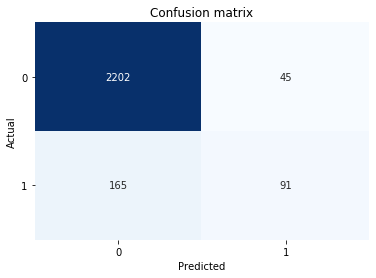

bow-min-2 + svc
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2247
           1       0.57      0.48      0.52       256

    accuracy                           0.91      2503
   macro avg       0.76      0.72      0.74      2503
weighted avg       0.90      0.91      0.91      2503



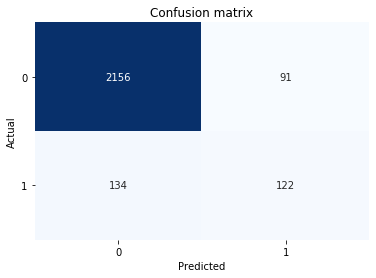

 ====  bow-min-2  ==== 


,Accuracy,F1-score,Recall,Precision,AUC
lr,0.916101,0.464286,0.355469,0.669118,0.667721
svc,0.910108,0.520256,0.476562,0.572770,0.718032


tfidf-min-2 + lr
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2247
           1       0.72      0.13      0.22       256

    accuracy                           0.91      2503
   macro avg       0.81      0.56      0.58      2503
weighted avg       0.89      0.91      0.88      2503



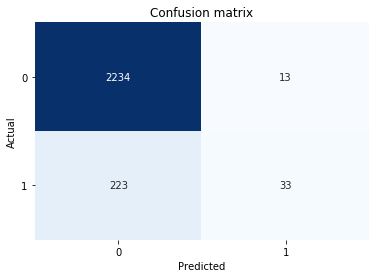

tfidf-min-2 + svc
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2247
           1       0.71      0.26      0.38       256

    accuracy                           0.91      2503
   macro avg       0.82      0.62      0.67      2503
weighted avg       0.90      0.91      0.89      2503



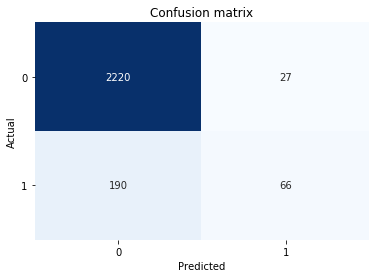

 ====  tfidf-min-2  ==== 


,Accuracy,F1-score,Recall,Precision,AUC
lr,0.905713,0.218543,0.128906,0.717391,0.561560
svc,0.913304,0.378223,0.257812,0.709677,0.622898


 ==== Final Result Summary ==== 


,Accuracy,F1-score,Recall,Precision,AUC
bow-min-2 + lr,0.916101,0.464286,0.355469,0.669118,0.667721
bow-min-2 + svc,0.910108,0.520256,0.476562,0.572770,0.718032
tfidf-min-2 + lr,0.905713,0.218543,0.128906,0.717391,0.561560
tfidf-min-2 + svc,0.913304,0.378223,0.257812,0.709677,0.622898


In [296]:
# implement suggesion 3 - Eliminate words doesn't appear more than twise 

model_dict = {"lr":lr,'svc':svc}
feature_dict = {"bow-min-2":bow,"tfidf-min-2":tfidf}
final_result4 = classifier_feature(df,model_dict,feature_dict,analyzer='word',ngram=(1,1),min_df=2)

This suggested improvement surprassed previously conducted (Part c) BOW + SVC text representaion and classifier combination. Classified 123 instances as suggesions

 Here best F1-score 0.52 achived with BOW (unigram min frequency word appear is 2) representation and SVC classifier. This is around 0.1 improvement compared to part c f1-score.

#### d) Evaluation and comparison of suggested improvemnt with first implementation 

In [110]:
# effect of suggested improvements
pd.concat([final_result1,final_result3,final_result4,final_result2])

,Accuracy,F1-score,Recall,Precision,AUC
bow + lr,0.916500,0.468193,0.359375,0.671533,0.669674
bow + svc,0.908510,0.513800,0.472656,0.562791,0.715411
tfidf + lr,0.903716,0.204620,0.121094,0.659574,0.556987
tfidf + svc,0.912105,0.371429,0.253906,0.691489,0.620500
bow-words + lr,0.916900,0.434783,0.312500,0.714286,0.649129
bow-words + svc,0.915302,0.492823,0.402344,0.635802,0.688043
tfidf-words + lr,0.904914,0.179310,0.101562,0.764706,0.549001
tfidf-words + svc,0.916500,0.436658,0.316406,0.704348,0.650637
bow-min-2 + lr,0.916900,0.472081,0.363281,0.673913,0.671627
bow-min-2 + svc,0.909309,0.520085,0.480469,0.566820,0.719318


Implemented the three suggesion on orginal datasest. Third suggesion (min_df =2)  make an 0.01 improvemnet (BOW with SVC classifier) of f1 score compared to first implementation of BOW with SVC classifier.

### Answer (e)

1. Unsupervised approach to categorize suggesions in to different aspect
2. How could optimal number of categorieze determine ?
3. visualize your solution

#### e)1. Unsupervised approach to categorize suggesions in to different aspect

In [297]:
# create dataframe for only suggestions instances in orginal 

df_suggesions = df[df['label']==1]
print("Size of suggesions dataset", len(df_suggesions))
dataset_details(df_suggesions)
df_suggesions.head()

Size of suggesions dataset 852
Unique word count =  2032  Total word count =  8085
Minimum document length =  1  Maximum document length =  35


,id,text,label,cleaned
13,berlin-hotel-190599-review-2.json_8,"If you do end up here, be sure to specify a room at the back of the hotel.",1,"[end, sure, specifi, room, back, hotel]"
17,berlin-hotel-190599-review-3.json_2,and I was woken by the early morning firing up of the local bus service (a courtyard-facing room is essential unless you have industrial strength earplugs.)The rooms are small and ill-conceived.,1,"[woken, earli, morn, fire, local, bu, servic, courtyard, face, room, essenti, unless, industri, strength, earplug, room, small, ill, conceiv]"
35,berlin-hotel-190599-review-4.json_16,"As a general tip, if you need to use the internet whilst in Berlin, look up the Easy Internet cafes before you go, there's a huge one in Kurfurstendam",1,"[gener, tip, need, use, internet, whilst, berlin, look, easi, internet, cafe, go, huge, one, kurfurstendam]"
41,berlin-hotel-190599-review-4.json_22,"If you expect no more than that, you won't be disappointed.",1,"[expect, disappoint]"
71,berlin-hotel-191437-review-1.json_2,"Room was big, bath was lovely, but watch out for the tile floor after you shower.",1,"[room, big, bath, love, watch, tile, floor, shower]"


created new dataframe only inclusding suggesions

In [298]:
# BOW representation for k-mean

def bow_new(df,analyzer="word",ngram=(1,1),min_df=2):

    df_list = [" ".join(i) for i in df]
    #print(df_list)
    bow = CountVectorizer(analyzer=analyzer,ngram_range=ngram,lowercase=False,min_df=min_df)
    df_bow = bow.fit_transform(df_list)
    #print(bow.get_feature_names())

    #print(df_bow.toarray())
    return df_bow,bow

In [299]:
# Apply k-means clustering
from sklearn.cluster import KMeans

def kmeans(feature,num_clusters):
    kmean = KMeans(n_clusters=num_clusters, max_iter=1000,random_state=1)
    kmean.fit(feature)

    return kmean

#### e) 2. How could optimal number of categorieze determine ?


In [300]:
# function to find optimal number of categories (optimal cluster)

from sklearn.metrics import silhouette_score
def optimal_k(feature):
    SSE = []
  # silhouette coefficients for each k
    silhouette_coefficients = []

  # Run K means from K= 2 to 20
    for k in range(2, 15):
        num_clusters = k
        kmean_obj = kmeans(feature, num_clusters)
    
        SSE.append(kmean_obj.inertia_)
        score = silhouette_score(feature, kmean_obj.labels_)
        silhouette_coefficients.append(score)

    return (SSE, silhouette_coefficients)


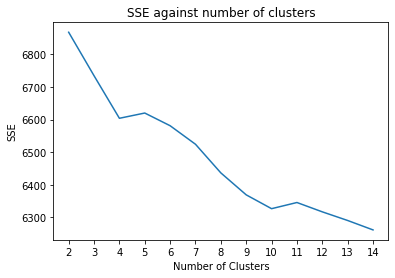

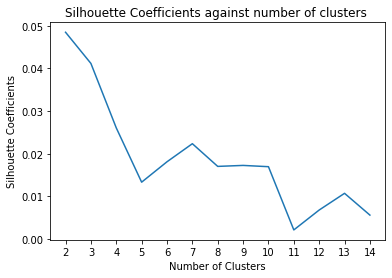

In [301]:
# Insert code for part (e)
# 3. Implement solution
bow_feature,bow_vect = bow_new(df_suggesions['cleaned'])
SSE, silhouette_coefficients = optimal_k(bow_feature)
#print("SSE = ",SSE,"  silhousette coeff. = ",silhouette_coefficients)

# Plot SSE against number of clusters
plt.title("SSE against number of clusters")
plt.plot(range(2, 15), SSE)
plt.xticks(range(2, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()


# plot silhouette coefficients
plt.title("Silhouette Coefficients against number of clusters ")
plt.plot(range(2, 15), silhouette_coefficients)
plt.xticks(range(2, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficients")
plt.show()

#### Optimal set of categories
It can be oberved two elbow points in first graph. k= 4 and k =10. Considering both elbow curve plot and max silhouette score > 0 when cluster = 4, optimal numbe of cluster decided as = 4 .

#### e) 3. visualiztion

C:\Users\Kavishka\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


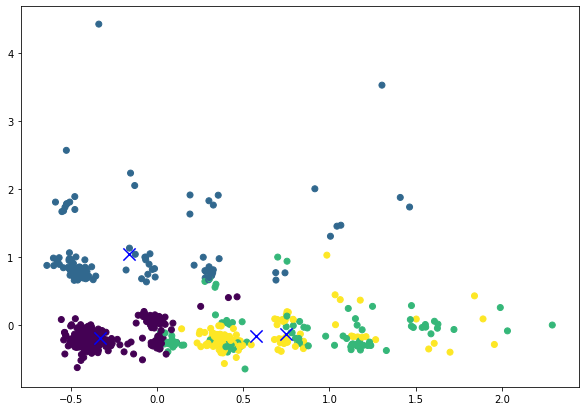

In [302]:
from sklearn.decomposition import PCA

# reduce the features to 2D
kmean = kmeans(bow_feature,4)
labels = df_suggesions['cluster_label'] = kmean.labels_
centroids = kmean.cluster_centers_

pca = PCA(n_components=2, random_state=1)
reduced_features = pca.fit_transform(bow_feature.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(kmean.cluster_centers_)
plt.figure(figsize=(10,7)) 
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=kmean.labels_)
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

Two clusters shows considerable good cluster but other two is too much distributed and have a considerable distance with instances

In [303]:
df_suggesions.head()

,id,text,label,cleaned,cluster_label
13,berlin-hotel-190599-review-2.json_8,"If you do end up here, be sure to specify a room at the back of the hotel.",1,"[end, sure, specifi, room, back, hotel]",1
17,berlin-hotel-190599-review-3.json_2,and I was woken by the early morning firing up of the local bus service (a courtyard-facing room is essential unless you have industrial strength earplugs.)The rooms are small and ill-conceived.,1,"[woken, earli, morn, fire, local, bu, servic, courtyard, face, room, essenti, unless, industri, strength, earplug, room, small, ill, conceiv]",1
35,berlin-hotel-190599-review-4.json_16,"As a general tip, if you need to use the internet whilst in Berlin, look up the Easy Internet cafes before you go, there's a huge one in Kurfurstendam",1,"[gener, tip, need, use, internet, whilst, berlin, look, easi, internet, cafe, go, huge, one, kurfurstendam]",0
41,berlin-hotel-190599-review-4.json_22,"If you expect no more than that, you won't be disappointed.",1,"[expect, disappoint]",0
71,berlin-hotel-191437-review-1.json_2,"Room was big, bath was lovely, but watch out for the tile floor after you shower.",1,"[room, big, bath, love, watch, tile, floor, shower]",1


k-means algorithm clustered suggesions into  4 categories.

### Answer (f)

1. evalaute performence of best model on dirt dataset
2. Print apporiate metrics

#### f) evaluate performence of best model

In [304]:
# read annotated dataset
dirty_df = pd.read_csv('./Test Data/Test/Test.csv')
dirty_df.head()

,Unnamed: 0,text,test
0,7,"also, the hotel would be advised to forget the waffles, chocolate and water freebies and provide tea and coffee making facilities.","food, facilities"
1,20,and curtains could do with a splash of colour.,"facility, room"
2,25,the public areas are those you would expect from a 2-3 star hotel - all again in need of a major updating.,"value, facility, quality"
3,33,"the comforter, drapes and furniture were in need of replacement.","facility, room, quality"
4,43,the carpets and furniture are in need of renewal.,"value, facility, quality"


created dataframe for New Test dataset

In [305]:
# preprocessing
def preprocess(df):
    df['cleaned'] = df['text'].apply(lambda x: removePunctuation(x))
    df['cleaned'] = df['cleaned'].apply(lambda x: lowercase(x))
    df['cleaned'] = df['cleaned'].apply(lambda x: removeStopWords(x))
    df["cleaned"] = df["cleaned"].apply(lambda x: [porter.stem(word) for word in x] )
    return df
dirty_df = preprocess(dirty_df)
dirty_df.head()

,Unnamed: 0,text,test,cleaned
0,7,"also, the hotel would be advised to forget the waffles, chocolate and water freebies and provide tea and coffee making facilities.","food, facilities","[also, hotel, would, advis, forget, waffl, chocol, water, freebi, provid, tea, coffe, make, facil]"
1,20,and curtains could do with a splash of colour.,"facility, room","[curtain, could, splash, colour]"
2,25,the public areas are those you would expect from a 2-3 star hotel - all again in need of a major updating.,"value, facility, quality","[public, area, would, expect, 2, 3, star, hotel, need, major, updat]"
3,33,"the comforter, drapes and furniture were in need of replacement.","facility, room, quality","[comfort, drape, furnitur, need, replac]"
4,43,the carpets and furniture are in need of renewal.,"value, facility, quality","[carpet, furnitur, need, renew]"


Conducted same preprocessing stepes conducted in part a)

In [306]:
# kmeans for dirty antated dataset
dirty_bow_feature = bow_vect.transform([" ".join(i) for i in dirty_df['cleaned']])
#bow_e,ow_v2 = bow_new(dirty_df['cleaned'])
dirty_df['cluster_label'] = kmean.predict(dirty_bow_feature)
dirty_df.head()

,Unnamed: 0,text,test,cleaned,cluster_label
0,7,"also, the hotel would be advised to forget the waffles, chocolate and water freebies and provide tea and coffee making facilities.","food, facilities","[also, hotel, would, advis, forget, waffl, chocol, water, freebi, provid, tea, coffe, make, facil]",3
1,20,and curtains could do with a splash of colour.,"facility, room","[curtain, could, splash, colour]",0
2,25,the public areas are those you would expect from a 2-3 star hotel - all again in need of a major updating.,"value, facility, quality","[public, area, would, expect, 2, 3, star, hotel, need, major, updat]",3
3,33,"the comforter, drapes and furniture were in need of replacement.","facility, room, quality","[comfort, drape, furnitur, need, replac]",0
4,43,the carpets and furniture are in need of renewal.,"value, facility, quality","[carpet, furnitur, need, renew]",0


Transformed to vector representaion and apply kmeans to predict labels

In [307]:
# label encoder
from sklearn.preprocessing import LabelEncoder

# convert text labels to numeric representation
label_encoder = LabelEncoder()
dirty_df['label'] = label_encoder.fit_transform(dirty_df['test'])
dirty_df.head()

,Unnamed: 0,text,test,cleaned,cluster_label,label
0,7,"also, the hotel would be advised to forget the waffles, chocolate and water freebies and provide tea and coffee making facilities.","food, facilities","[also, hotel, would, advis, forget, waffl, chocol, water, freebi, provid, tea, coffe, make, facil]",3,5
1,20,and curtains could do with a splash of colour.,"facility, room","[curtain, could, splash, colour]",0,2
2,25,the public areas are those you would expect from a 2-3 star hotel - all again in need of a major updating.,"value, facility, quality","[public, area, would, expect, 2, 3, star, hotel, need, major, updat]",3,26
3,33,"the comforter, drapes and furniture were in need of replacement.","facility, room, quality","[comfort, drape, furnitur, need, replac]",0,3
4,43,the carpets and furniture are in need of renewal.,"value, facility, quality","[carpet, furnitur, need, renew]",0,26


Converted text labels to numerical format

#### f) print apporipate metrcs

In [308]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import jaccard_score

print("Rand index = ",adjusted_rand_score(dirty_df['label'],dirty_df['cluster_label']))
print("Jaccard index  = ",jaccard_score(dirty_df['label'], dirty_df['cluster_label'],average='macro'))


Rand index =  0.11797851424626211
Jaccard index  =  0.004666666666666667


Rand index is 0.12 little higher than randomly assingning clusters
Jaccard index  or accard similarity coefficient is 0.004. There is 0.4% overlapping instances.

### Answer (g)

Possible improvements can be conducting data augementation for dataset. Both undersampling and oversampling can be considered here due to large difference of suggesion and non suggesion classes. Another possible improvemnt is conducting GridSearch to find most suitable n-gram range in text representaion and classifeir parameters.

Higher performence given by unigram bow with reduced frequency and support vector classifer combination for non suggesion and suggesion classification. Other two suggested improvement didn't gave any improvemnt eventhough it's expected to give performence improvement. Character representaion might not worked due to fact english is not higly morphological language liek Sinhala. 

Using a clustering for Text classification specificaly multilabel classification is very diffiult to get good performence. I think that's why we have low value for Rand index and Jaccard index.